In [1]:
# Install the yfinance package if not installed
!pip install yfinance

import yfinance as yf #import the package

# Fetch data for Apple (AAPL) for the last 5 years
ticker = 'AAPL'
data = yf.download(ticker, start='2018-01-01', end='2023-01-01')

# Preview the first few rows of the dataset
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.479839,40.489241,39.774861,39.986357,102223600
2018-01-03,40.472797,41.017982,40.409352,40.543296,118071600
2018-01-04,40.660789,40.764187,40.437547,40.545642,89738400
2018-01-05,41.123714,41.210661,40.665479,40.757126,94640000
2018-01-08,40.970982,41.267071,40.872282,40.970982,82271200


**Computing Daily Returns**

In [2]:
import pandas as pd

# Assuming 'data' is a DataFrame with 'Adj Close' column for adjusted closing prices
data['Daily Return'] = data['Close'].pct_change()

# Display the first few rows
print(data[['Close', 'Daily Return']].head())

Price           Close Daily Return
Ticker           AAPL             
Date                              
2018-01-02  40.479839          NaN
2018-01-03  40.472797    -0.000174
2018-01-04  40.660789     0.004645
2018-01-05  41.123714     0.011385
2018-01-08  40.970982    -0.003714


In [3]:
data.tail()

Price,Close,High,Low,Open,Volume,Daily Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2022-12-23,130.344467,130.898028,128.149982,129.415269,63814900,-0.002798
2022-12-27,128.535538,129.899682,127.240596,129.870028,69007800,-0.013878
2022-12-28,124.591385,129.524031,124.423341,128.179661,85438400,-0.030685
2022-12-29,128.120346,128.980342,126.261956,126.518963,75703700,0.028324
2022-12-30,128.436661,128.456435,125.965402,126.934142,77034200,0.002469


In [4]:
# Resampling to monthly frequency
monthly_data = data['Close'].resample('M').last()

# Preview the resampled data
print(monthly_data.head())

Ticker           AAPL
Date                 
2018-01-31  39.344822
2018-02-28  42.027546
2018-03-31  39.587811
2018-04-30  38.993229
2018-05-31  44.262142


<ipython-input-4-c6594fc49347>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close'].resample('M').last()


In [5]:
#missing value check
monthly_data.isna().sum()

,0
Ticker,
AAPL,0


How to Handle Missing Data During Resampling

Sometimes resampling can introduce missing data, especially when resampling to lower frequencies (e.g., from daily to monthly). Pandas provides several ways to handle missing values after resampling:

ffill() (Forward Fill): Fills missing values with the previous valid value

In [6]:
monthly_data = data['Close'].resample('ME').last().ffill()
#M is now getting replaced with ME

bfill() (Backward Fill): Fills missing values with the next valid value.

In [7]:
monthly_data = data['Close'].resample('M').last().bfill()

<ipython-input-7-88c2ceefafed>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close'].resample('M').last().bfill()


In [8]:
monthly_data = data['Close'].resample('M').mean().interpolate(method='linear')

<ipython-input-8-eee006bd2348>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close'].resample('M').mean().interpolate(method='linear')


In [9]:
# Summary statistics for the adjusted close prices
summary_stats = data['Close'].describe()
print(summary_stats)


Ticker         AAPL
count   1259.000000
mean      95.702890
std       46.139144
min       33.915253
25%       48.939249
50%       89.189911
75%      140.533104
max      178.879913


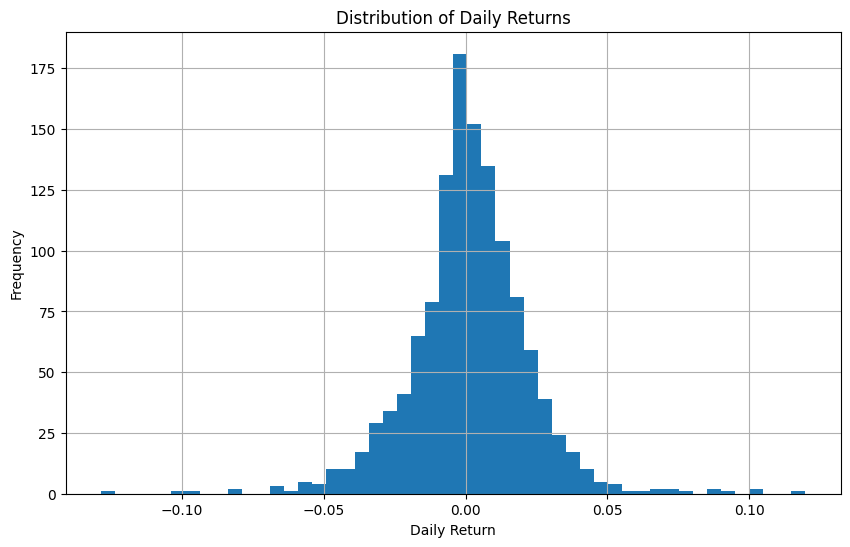

In [10]:
import matplotlib.pyplot as plt

# Histogram for daily returns
data['Daily Return'].hist(bins=50, figsize=(10,6))
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x600 with 0 Axes>

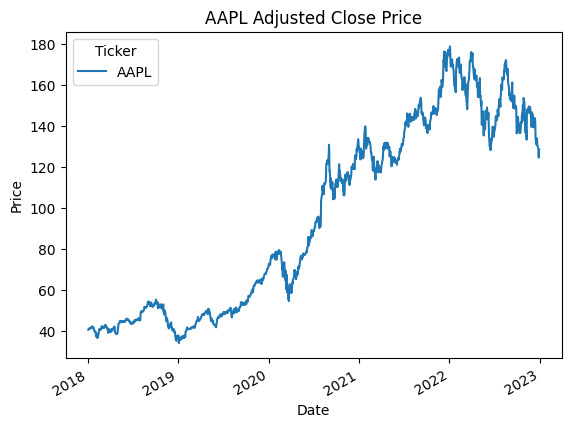

In [11]:
# Plotting the adjusted close price
plt.figure(figsize=(10,6))
data['Close'].plot()

#plt.plot(x,y)
plt.title('AAPL Adjusted Close Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()


Rolling Mean (Moving Average)

Significance:

The rolling mean calculates the average value of a time series over a specific window (e.g., 30 days) and "rolls" this window along the time series data. This smooths out short-term fluctuations and highlights longer-term trends.

In financial data, a rolling mean is often used to smooth out price data, helping to identify trends without being overly sensitive to daily volatility.

How to Interpret:

Trend Identification: If the rolling mean is moving upwards, it suggests an upward trend in the data (e.g., an increasing stock price).

If it’s moving downwards, it indicates a downward trend.

Momentum: Comparing the current price with the rolling mean can give insights into the momentum. If the price is consistently above the rolling mean, it indicates positive momentum (bullish). If it is consistently below, it suggests negative momentum (bearish).

Rolling Standard Deviation

Significance:

The rolling standard deviation measures how spread out the values in the data are over a specific window of time. In financial terms, this is often referred to as volatility.

High standard deviation indicates that the data points (e.g., stock prices or returns) are widely spread out, meaning the asset is more volatile. Low standard deviation suggests less volatility and that the prices are more stable.

How to Interpret:

Volatility: A higher rolling standard deviation indicates higher volatility over the window. It shows that the stock (or any financial instrument) has been experiencing larger price swings.

Risk: In finance, volatility is often equated with risk. If the rolling standard deviation is increasing, it may indicate that the asset is becoming riskier to hold. Conversely, a decreasing rolling standard deviation suggests that the asset is stabilizing.

Practical Interpretation in Financial Analysis:

Bullish vs. Bearish Trends:

If the price consistently stays above the rolling mean, this may indicate a strong bullish (upward) trend.

If the price consistently stays below the rolling mean, it indicates a bearish (downward) trend.

Volatility Analysis:

Investors might avoid highly volatile stocks (high rolling standard deviation) if they are risk-averse, as high volatility suggests the stock may experience unpredictable price swings. Conversely, risk-tolerant investors might be attracted to volatile stocks for potential high returns.

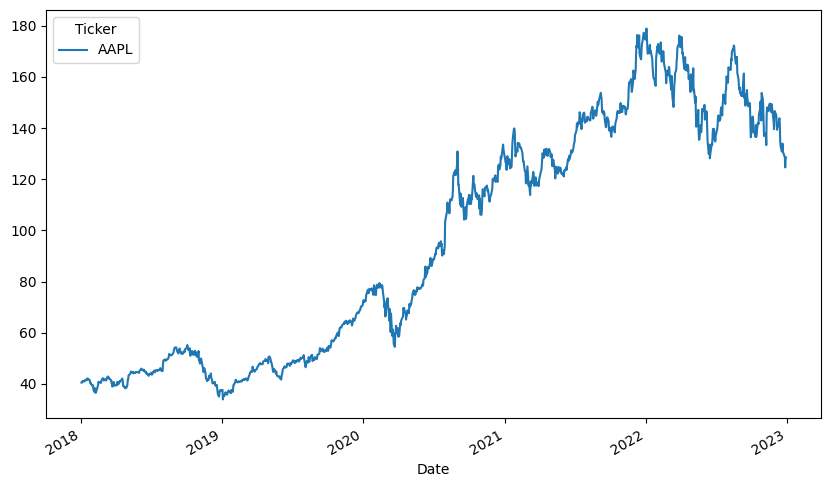

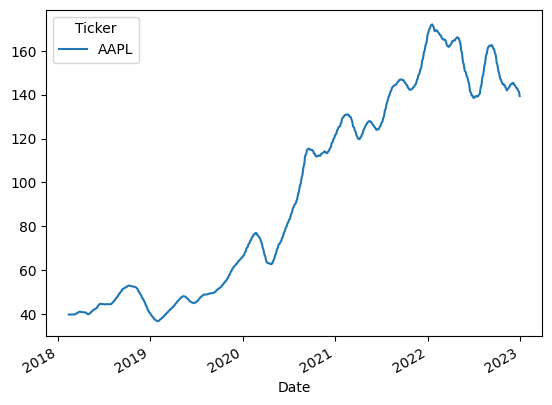

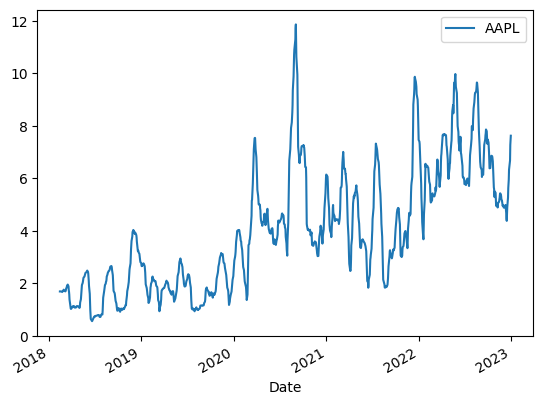

In [12]:
# Plot rolling mean and standard deviation
data['Close'].plot(label='Original', figsize=(10,6))
#line plot of original stock prices

data['Close'].rolling(window=30).mean().plot(label='30-Day Moving Average')
#line plot rolling mean values

data['Close'].rolling(window=30).std().plot(label='30-Day Moving Std')
plt.legend()
plt.show()


In [13]:
# Resample to weekly frequency, then apply a 4-week rolling mean
weekly_rolling = data['Close'].resample('W').mean().rolling(window=4).mean()
print(weekly_rolling.head())


Ticker           AAPL
Date                 
2018-01-07        NaN
2018-01-14        NaN
2018-01-21        NaN
2018-01-28  41.160526
2018-02-04  40.749170


w1
w2
w3
w4
w5
w6
w7
w8

m1
m2
m3
m4
m5
m6
m7

In [14]:
weekly_rolling.isnull().sum()

,0
Ticker,
AAPL,3


In [15]:
data.head()

Price,Close,High,Low,Open,Volume,Daily Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2018-01-02,40.479839,40.489241,39.774861,39.986357,102223600,NaN
2018-01-03,40.472797,41.017982,40.409352,40.543296,118071600,-0.000174
2018-01-04,40.660789,40.764187,40.437547,40.545642,89738400,0.004645
2018-01-05,41.123714,41.210661,40.665479,40.757126,94640000,0.011385
2018-01-08,40.970982,41.267071,40.872282,40.970982,82271200,-0.003714


In [16]:
# Check for missing values
missing_values = data.isnull().sum() #isnull or isna
print(missing_values)


Price         Ticker
Close         AAPL      0
High          AAPL      0
Low           AAPL      0
Open          AAPL      0
Volume        AAPL      0
Daily Return            1
dtype: int64


In [17]:
data.dropna()
#drop the missing value

Price,Close,High,Low,Open,Volume,Daily Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2018-01-03,40.472797,41.017982,40.409352,40.543296,118071600,-0.000174
2018-01-04,40.660789,40.764187,40.437547,40.545642,89738400,0.004645
2018-01-05,41.123714,41.210661,40.665479,40.757126,94640000,0.011385
2018-01-08,40.970982,41.267071,40.872282,40.970982,82271200,-0.003714
2018-01-09,40.966270,41.137814,40.750078,41.017969,86336000,-0.000115
...,...,...,...,...,...,...
2022-12-23,130.344467,130.898028,128.149982,129.415269,63814900,-0.002798
2022-12-27,128.535538,129.899682,127.240596,129.870028,69007800,-0.013878


In [18]:
# Fill missing values using forward fill
data_filled = data.fillna(method='bfill')

# Check if missing values still exist
print(data_filled.isnull().sum())


Price         Ticker
Close         AAPL      0
High          AAPL      0
Low           AAPL      0
Open          AAPL      0
Volume        AAPL      0
Daily Return            0
dtype: int64


<ipython-input-18-05f0e36899de>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='bfill')


In [19]:
data_filled.head()

Price,Close,High,Low,Open,Volume,Daily Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2018-01-02,40.479839,40.489241,39.774861,39.986357,102223600,-0.000174
2018-01-03,40.472797,41.017982,40.409352,40.543296,118071600,-0.000174
2018-01-04,40.660789,40.764187,40.437547,40.545642,89738400,0.004645
2018-01-05,41.123714,41.210661,40.665479,40.757126,94640000,0.011385
2018-01-08,40.970982,41.267071,40.872282,40.970982,82271200,-0.003714


In [20]:
from scipy import stats

# Drop missing values from 'Daily Return' and calculate z-scores
daily_returns_clean = data['Daily Return'].dropna()
z_scores = stats.zscore(daily_returns_clean)

# Define a threshold for outliers (absolute Z-score > 3)
outliers = daily_returns_clean[abs(z_scores) > 3]

# Display the outliers
print(outliers)


Date
2018-11-02   -0.066331
2018-12-26    0.070422
2019-01-03   -0.099607
2019-01-30    0.068335
2020-02-27   -0.065368
2020-03-02    0.093101
2020-03-09   -0.079092
2020-03-10    0.072021
2020-03-12   -0.098755
2020-03-13    0.119809
2020-03-16   -0.128647
2020-03-20   -0.063485
2020-03-24    0.100326
2020-04-06    0.087238
2020-07-31    0.104688
2020-09-03   -0.080061
2020-09-08   -0.067295
2022-01-28    0.069778
2022-10-28    0.075552
2022-11-10    0.088974
Name: Daily Return, dtype: float64


In [21]:
# Define a threshold value for outliers, for example, 5% (0.05)
threshold = 0.05 #significance level

# Use the clip function to limit the 'Daily Return' column to this range
# Any value above 5% is capped to 5%, and any value below -5% is capped to -5%
data['Daily Return'] = data['Daily Return'].clip(lower=-threshold, upper=threshold)

# Now, print the statistics of the 'Daily Return' column to see the effect
print(data['Daily Return'].describe())


count    1258.000000
mean        0.001069
std         0.018932
min        -0.050000
25%        -0.009110
50%         0.001049
75%         0.012367
max         0.050000
Name: Daily Return, dtype: float64


In [22]:
from datetime import datetime, timedelta

datetime.now()

datetime.datetime(2025, 2, 13, 11, 43, 5, 917345)

In [23]:
import yfinance as yf

# Calculate the start date as 3 years from today
start_date = (datetime.now() - timedelta(days=3*365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

# Use yfinance to download the data
data = yf.download('AAPL', start=start_date, end=end_date)

# Display the first few rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-02-14,166.187149,166.875984,163.904135,164.701217,86185500
2022-02-15,170.034805,170.192258,167.535313,168.243834,62527400
2022-02-16,169.798676,170.576072,167.338538,169.109840,61177400
2022-02-17,166.187149,169.168833,165.783683,168.302860,69589300
2022-02-18,164.632339,167.820667,163.540038,167.112161,82772700


In [24]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-02-06,232.963867,233.543232,230.176923,231.035979,29925300
2025-02-07,227.380005,233.743004,227.010401,232.344548,39707200
2025-02-10,227.649994,230.589996,227.199997,229.570007,33115600
2025-02-11,232.619995,235.229996,228.130005,228.199997,53718400
2025-02-12,236.869995,236.960007,230.679993,231.199997,45201200


In [25]:
# Calculate start and end dates for the last 3 years
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=3*365)).strftime('%Y-%m-%d')

# list of Tickers for apple and Alphabet (Google)
tickers = ['AAPL', 'GOOG']

# Download stock data
data = yf.download(tickers, start=start_date, end=end_date)

data.head()

[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL        GOOG        AAPL        GOOG        AAPL   
Date                                                                     
2022-02-14  166.187149  134.815582  166.875984  135.678981  163.904135   
2022-02-15  170.034805  135.937057  170.192258  137.406266  167.535313   
2022-02-16  169.798676  136.995255  170.576072  137.452109  167.338538   
2022-02-17  166.187149  131.834808  169.168833  136.349577  165.783683   
2022-02-18  164.632339  130.000381  167.820667  133.344870  163.540038   

Price                         Open                Volume            
Ticker            GOOG        AAPL        GOOG      AAPL      GOOG  
Date                                                                
2022-02-14  132.824735  164.701217  132.887999  86185500  26792000  
2022-02-15  135.054228  168.243834  136.979302  62527400  26578000  
2022-02-16  134.340943  169.109840  135.942032  61177400  25610000  
2022-02-17  131.728683  168.302860  135.662547  69589300  30968000  
2022-02-18  129.840510  167.112161  132.561187  82772700  31858000

In [26]:
# Save the 'Adj Close' prices to a CSV file
adj_close_prices = data['Close']
adj_close_prices.head()

Ticker,AAPL,GOOG
Date,,
2022-02-14,166.187149,134.815582
2022-02-15,170.034805,135.937057
2022-02-16,169.798676,136.995255
2022-02-17,166.187149,131.834808
2022-02-18,164.632339,130.000381


In [27]:
adj_close_prices.to_csv('AAPL_GOOGL_last_3_years.csv')

print('Data saved to AAPL_GOOGL_last_3_years.csv')

Data saved to AAPL_GOOGL_last_3_years.csv


**Time Series Forecasting**

In [28]:
import pandas as pd

# Load the uploaded AAPL stock price data
data = pd.read_csv("AAPL_GOOGL_last_3_years.csv")
aapl_data = data[["Date", "AAPL"]]
# Display the first few rows of the data to understand its structure
aapl_data.head()

,Date,AAPL
0,2022-02-14,166.187149
1,2022-02-15,170.034805
2,2022-02-16,169.798676
3,2022-02-17,166.187149
4,2022-02-18,164.632339


In [29]:
aapl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    752 non-null    object 
 1   AAPL    752 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.9+ KB


In [30]:
# Convert the 'Date' column to datetime and set it as the index
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])
aapl_data.set_index('Date', inplace=True)


<ipython-input-30-1a24192e24ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])


In [31]:
aapl_data.head()

,AAPL
Date,
2022-02-14,166.187149
2022-02-15,170.034805
2022-02-16,169.798676
2022-02-17,166.187149
2022-02-18,164.632339


In [32]:
# Resample the data to daily frequency (if necessary)
aapl_data = aapl_data.asfreq('D', method='pad')

Decomposing Time Series

Time series decomposition helps break a time series into three components:

Trend: Long-term movement in the data.

Seasonality: Repeating patterns at regular intervals.

Residual: Random noise or irregular fluctuations.

Let's first set up the data for decomposition.

Decomposition of Time Series

We need to preprocess the dataset, focusing on the Adj Close values and convert the Date column to a datetime format.

<Figure size 1200x800 with 0 Axes>

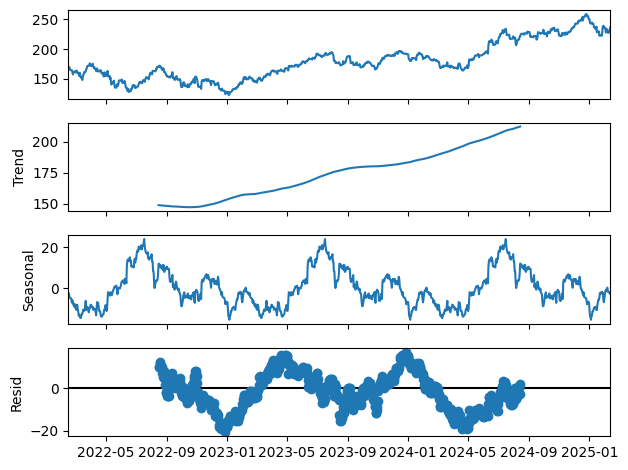

In [33]:
# Perform seasonal decomposition of the time series
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series
decomposition = seasonal_decompose(aapl_data, model='additive', period=365)

# Plot the decomposition results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
decomposition.plot() #line plots
plt.show()

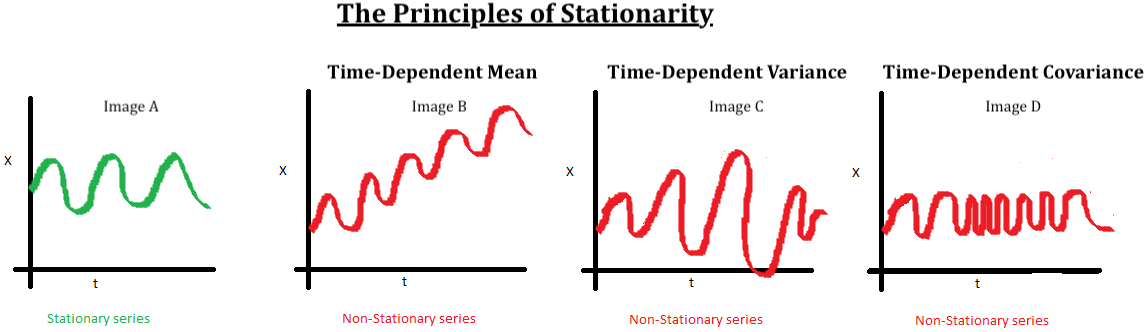

In [34]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'Adj Close' series
adf_result = adfuller(aapl_data)

# Extracting the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

adf_statistic, p_value, critical_values


(-0.6397295511973032,
 0.8617497476042775,
 {'1%': -3.436341508283391,
  '5%': -2.864185524365606,
  '10%': -2.5681785627437677})

the results of the Augmented Dickey-Fuller (ADF) test are as follows:

Null hypothesis is that data is non stationary

ADF Statistic: -1.164

p-value: 0.8617498648767139

Critical values:

1% level: -3.434

5% level: -2.863

10% level: -2.568

Since the p-value (0.688) is higher than the common significance level of 0.05, we fail to reject the null hypothesis that the data is non-stationary.

This means the stock price data is non-stationary, and we need to apply techniques like differencing to achieve stationarity.

**Determining the Right Order of Differencing**

To achieve stationarity, we apply differencing. We can use the Autocorrelation Function (ACF) plot to determine the appropriate number of differencing steps.

Let's first plot the ACF of the data and see how it behaves after differencing

   Y    X (lag 1)  lag 2
1 100  -
2 120  100
3 132  120          100
4 128  132          120
5 121  128
6 133  121
7 140  133
8 142  140

<Figure size 800x600 with 0 Axes>

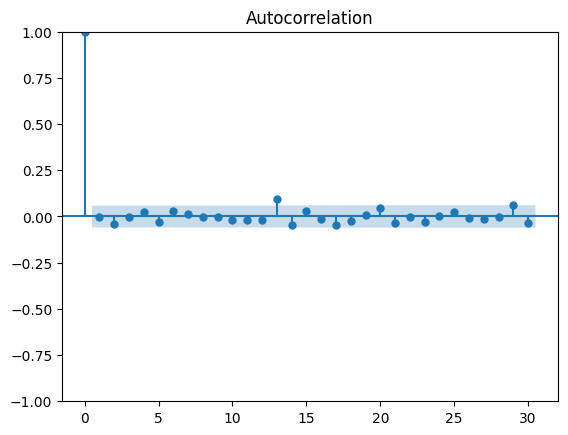

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Perform first differencing
adj_close_diff = aapl_data.diff().dropna()

# Plot ACF for differenced data
plt.figure(figsize=(8, 6))
plot_acf(adj_close_diff, lags=30)
plt.show()


Determining the Right Order of Differencing

The Autocorrelation Function (ACF) plot shows significant autocorrelations at lag 1 and gradually diminishes afterward, which indicates that the first differencing may be sufficient to achieve stationarity.

We generally aim to apply the smallest number of differencing steps needed to make the series stationary, and based on the plot, the series looks reasonably stationary after one differencing.

ARIMA Modelling

The ARIMA (AutoRegressive Integrated Moving Average) model is a powerful method for time series forecasting. It has three main parameters:

p: The number of lag observations (AutoRegressive term).

d: The number of times the series needs to be differenced (Integrated term).

q: The size of the moving average window (Moving Average term).

Let's proceed with determining the appropriate p and q values using the Partial Autocorrelation Function (PACF) and the ACF plots.

PACF for AutoRegressive (AR) Term (p)

We'll plot the PACF to determine the order of the AR term

<Figure size 800x600 with 0 Axes>

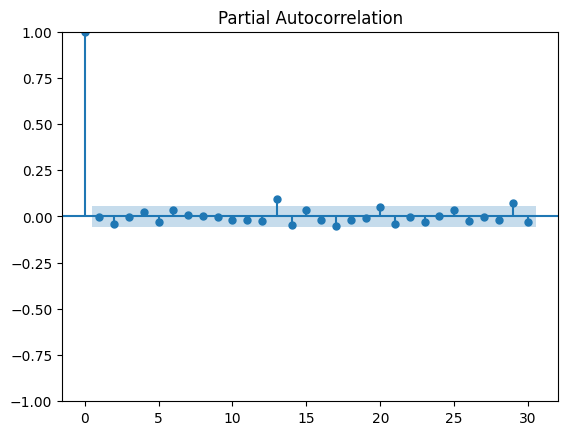

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF for the differenced data
plt.figure(figsize=(8, 6))
plot_pacf(adj_close_diff, lags=30)
plt.show()


**Finding the Best ARIMA Model**

To fine-tune the model, we use information criteria like Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). These metrics help in comparing different models and selecting the one that balances model complexity and goodness of fit.

We'll try different combinations of p, d, and q, and evaluate the models using AIC and BIC.

Let's test the ARIMA model with the initial guess of (p=1, d=1, q=1) and evaluate its performance



In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Build and fit the ARIMA model (p=1, d=1, q=1)
model = ARIMA(aapl_data, order=(1, 1, 1))
arima_result = model.fit()

# Extract AIC and BIC
aic = arima_result.aic
bic = arima_result.bic

aic, bic

(5037.075510305192, 5052.068298254138)

These values provide a basis for comparison. Lower values of AIC and BIC indicate a better model fit. We can experiment with other combinations of 𝑝 p, 𝑑 d, and 𝑞 q to find an optimal model, but for now, let's proceed with this model for forecasting.

In [38]:
aapl_data.tail()

,AAPL
Date,
2025-02-08,227.380005
2025-02-09,227.380005
2025-02-10,227.649994
2025-02-11,232.619995
2025-02-12,236.869995


In [39]:
aapl_data.index[-100:]

DatetimeIndex(['2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08',
               '2024-11-09', '2024-11-10', '2024-11-11', '2024-11-12',
               '2024-11-13', '2024-11-14', '2024-11-15', '2024-11-16',
               '2024-11-17', '2024-11-18', '2024-11-19', '2024-11-20',
               '2024-11-21', '2024-11-22', '2024-11-23', '2024-11-24',
               '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-28',
               '2024-11-29', '2024-11-30', '2024-12-01', '2024-12-02',
               '2024-12-03', '2024-12-04', '2024-12-05', '2024-12-06',
               '2024-12-07', '2024-12-08', '2024-12-09', '2024-12-10',
               '2024-12-11', '2024-12-12', '2024-12-13', '2024-12-14',
               '2024-12-15', '2024-12-16', '2024-12-17', '2024-12-18',
               '2024-12-19', '2024-12-20', '2024-12-21', '2024-12-22',
               '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
               '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
      

In [40]:
# Generate a forecast for the next 30 days
forecast_steps = 30
forecast = arima_result.get_forecast(steps=forecast_steps)

# Extract the predicted mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

forecast_mean

,predicted_mean
2025-02-13,236.867463
2025-02-14,236.867423
2025-02-15,236.867422
2025-02-16,236.867422
2025-02-17,236.867422
2025-02-18,236.867422
2025-02-19,236.867422
2025-02-20,236.867422
2025-02-21,236.867422
2025-02-22,236.867422


In [41]:
forecast_ci

,lower AAPL,upper AAPL
2025-02-13,232.140030,241.594897
2025-02-14,230.183776,243.551070
2025-02-15,228.682483,245.052362
2025-02-16,227.416744,246.318101
2025-02-17,226.301562,247.433283
2025-02-18,225.293335,248.441510
2025-02-19,224.366159,249.368686
2025-02-20,223.503153,250.231691
2025-02-21,222.692593,251.042251
2025-02-22,221.925941,251.808904


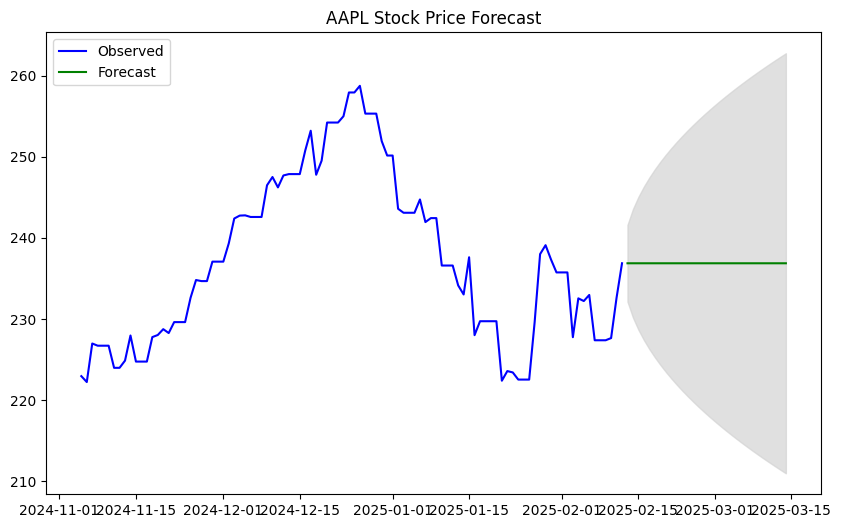

In [42]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(aapl_data.index[-100:], aapl_data[-100:], label='Observed', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green')

plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='lightgray', alpha=0.7)
plt.title('AAPL Stock Price Forecast')
plt.legend()
plt.show()

In [43]:
aapl_data.index[1]

Timestamp('2022-02-15 00:00:00')

In [44]:
aapl_data.index[-1]

Timestamp('2025-02-12 00:00:00')

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate the forecast for the training set (in-sample forecast)
in_sample_forecast = arima_result.predict(start=aapl_data.index[1], end=aapl_data.index[-1], typ='levels')

# Calculate the accuracy metrics
mae = mean_absolute_error(aapl_data[1:], in_sample_forecast)
mse = mean_squared_error(aapl_data[1:], in_sample_forecast)
rmse = np.sqrt(mse)

mae, mse, rmse


(1.4947117577884435, 5.81774220269113, 2.4119996274235054)

Grid Search

In [46]:
# Expand the grid of possible p, d, q values to experiment with a broader range
p_values = [1, 2,3]
d_values = [1,2]
q_values = [1, 2,3]

# Reinitialize variables to store the best model and its corresponding AIC
best_aic = float('inf')
best_order = None
best_model = None

# Perform grid search for ARIMA parameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Build and fit ARIMA model for each combination of p, d, q
                model = ARIMA(aapl_data, order=(p, d, q))
                model_fit = model.fit()

                # Check the AIC of the model
                current_aic = model_fit.aic

                # If the current model has a lower AIC, update the best model
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except:
                continue

best_order, best_aic


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py

((2, 1, 2), 5029.620711461645)

In [47]:
from statsmodels.tsa.arima.model import ARIMA

# Build and fit the ARIMA model (p=2, d=1, q=2)
model = ARIMA(aapl_data, order=(2, 1, 2))
arima_result = model.fit()

# Extract AIC and BIC
aic = arima_result.aic
bic = arima_result.bic

aic, bic

(5029.620711461645, 5054.608691376555)

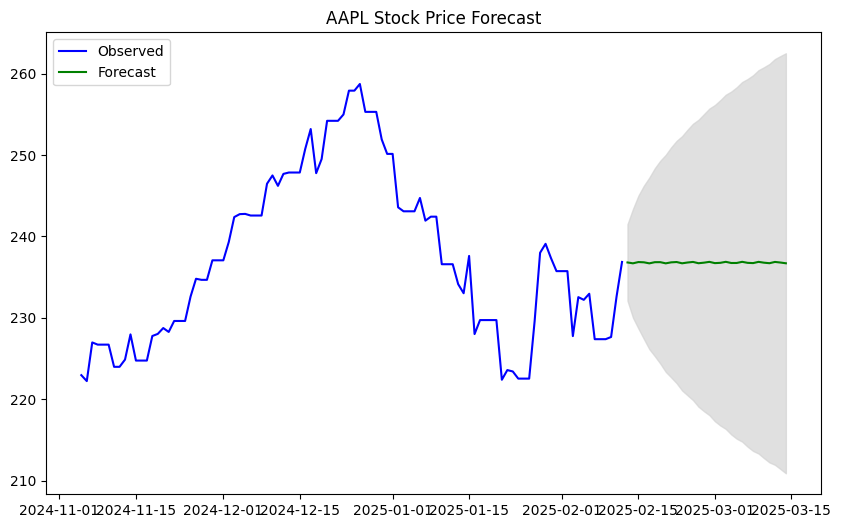

In [48]:
# Generate a forecast for the next 30 days
forecast_steps = 30
forecast = arima_result.get_forecast(steps=forecast_steps)

# Extract the predicted mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(aapl_data.index[-100:], aapl_data[-100:], label='Observed', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green')

plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='lightgray', alpha=0.7)
plt.title('AAPL Stock Price Forecast')
plt.legend()
plt.show()

In [49]:
forecast_mean

,predicted_mean
2025-02-13,236.806972
2025-02-14,236.700418
2025-02-15,236.856265
2025-02-16,236.826571
2025-02-17,236.697013
2025-02-18,236.839684
2025-02-19,236.844435
2025-02-20,236.697965
2025-02-21,236.821032
2025-02-22,236.859761


**Automated Approach:**

Alternatively, an automated grid search using libraries such as pmdarima can help find the best ARIMA parameters based on AIC or BIC. This approach is faster and more efficient.

Let’s try an automated approach using the pmdarima library to find the optimal ARIMA parameters.

Automated ARIMA Parameter Tuning

We’ll use the auto_arima function to automatically search for the best combination of 𝑝 p, 𝑑 d, and 𝑞 q by minimizing the AIC.

Let's proceed to fine-tune the ARIMA model parameters.

In [50]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5034.291, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5036.290, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5036.290, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5033.076, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5038.013, Time=1.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.670 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1095
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2515.538
Date:                Thu, 13 Feb 2025   AIC                           5033.076
Time:                        11:44:23   BIC                           5038.073
Sample:                    02-14-2022   HQIC                          5034.967
                         - 02-12-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.8177      0.145     40.167      0.000       5.534 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


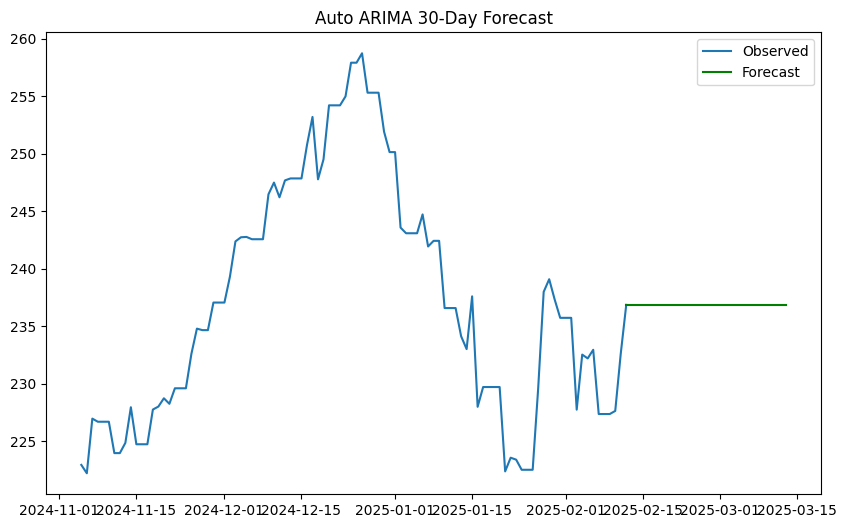

In [51]:
import pmdarima as pm

# Run auto_arima to find the best ARIMA model
auto_model = pm.auto_arima(aapl_data,
                           start_p=0, start_q=0,
                           test='adf',
                           max_p=5, max_q=5,
                           seasonal=False,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Print the summary of the best model
print(auto_model.summary())

# Forecast the next 30 days using the best ARIMA model
forecast = auto_model.predict(n_periods=30)

# Plot the forecast
plt.figure(figsize=(10, 6))

#line plot of original data or stock prices
plt.plot(aapl_data.index[-100:], aapl_data[-100:], label='Observed')

plt.plot(pd.date_range(aapl_data.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='green')
plt.title('Auto ARIMA 30-Day Forecast')
plt.legend()
plt.show()


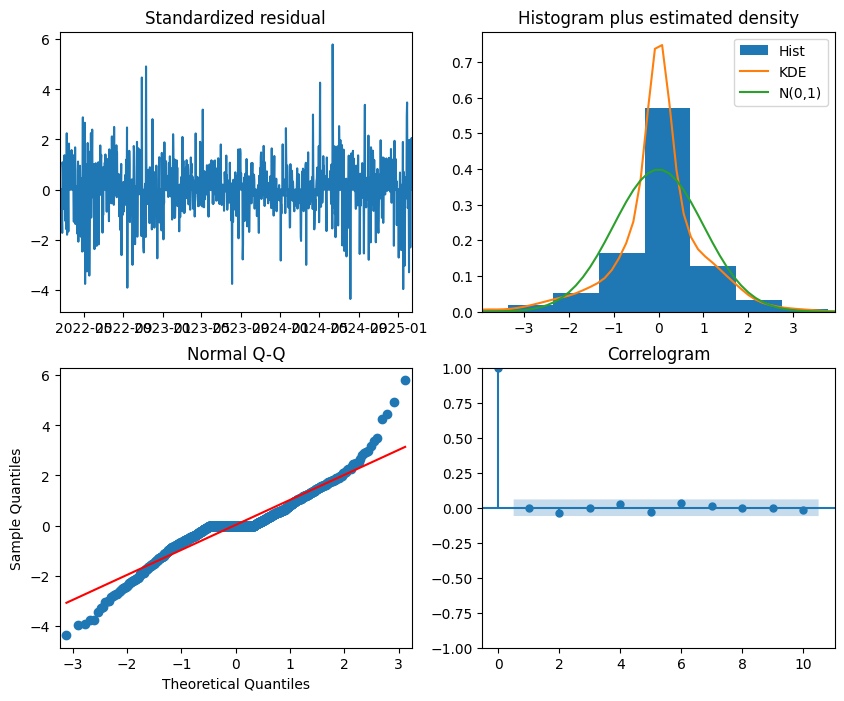

In [52]:
import matplotlib.pyplot as plt
auto_model.plot_diagnostics(figsize=(10,8))
plt.show()

Explanation of the Diagnostic Plots:

Standardized Residuals: This plot checks if the residuals are approximately normally distributed around zero.

Histogram plus KDE of the Residuals: It tests the normality of the residuals.

Normal Q-Q Plot: Checks if the residuals follow a normal distribution. Ideally, the points should lie on the line.

Correlogram of Residuals (ACF plot): Tests whether residuals are uncorrelated. Significant autocorrelation indicates that the model can be improved.

**Auto ARIMA with seasonal component**

In [53]:
# Fit auto_arima model (with seasonal component)
auto_sarima = pm.auto_arima(aapl_data,
                            seasonal=True,
                            m=12,  # Assuming monthly seasonality
                            start_p=0, start_q=0,
                            test='adf',
                            max_p=3, max_q=3,
                            start_P=0, start_Q=0,
                            max_P=3, max_Q=3,
                            d=1, D=1,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# Print the summary of the best model
print(auto_sarima.summary())

# Forecast the next 30 periods
forecast_sarima = auto_sarima.predict(n_periods=30)




/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5742.113, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5419.979, Time=0.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=6.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5742.577, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5300.180, Time=1.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=5247.346, Time=8.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=28.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=5245.346, Time=1.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5298.189, Time=0.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=12.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[12]             : AIC=5247.346, Time=2.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=5249.144, Time=7.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12] intercept   : AIC=5247.346, Time=7.47 sec

Best model:  ARIMA(0,1,0)(3,1,0)[12]          
Total fit time: 91.429 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1095
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -2618.673
Date:                            Thu, 13 Feb 2025   AIC                           5245.346
Time:                                    11:45:56   BIC                           5265.292
Sample:                                02-14-2022   HQIC                          5252.898
                                     - 02-12-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


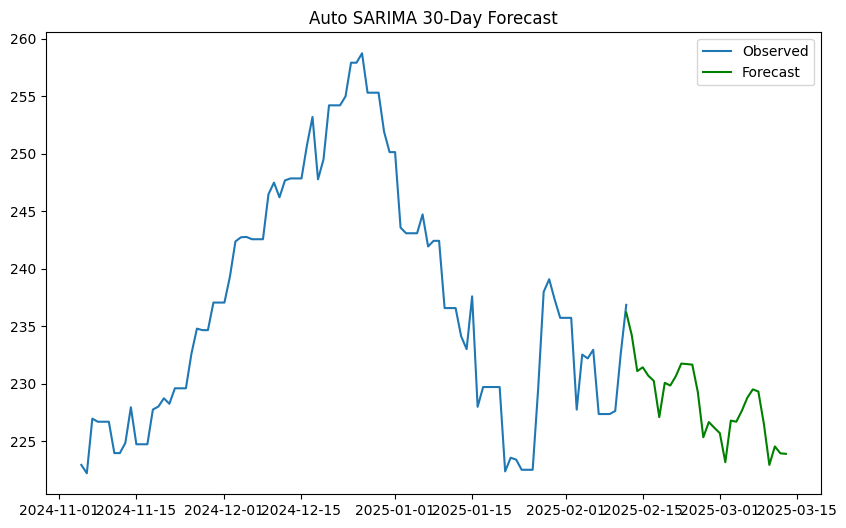

In [54]:
# Plot the observed and forecast values
plt.figure(figsize=(10, 6))
plt.plot(aapl_data.index[-100:], aapl_data[-100:], label='Observed')
plt.plot(pd.date_range(aapl_data.index[-1], periods=30, freq='D'), forecast_sarima, label='Forecast', color='green')
plt.title('Auto SARIMA 30-Day Forecast')
plt.legend()
plt.show()

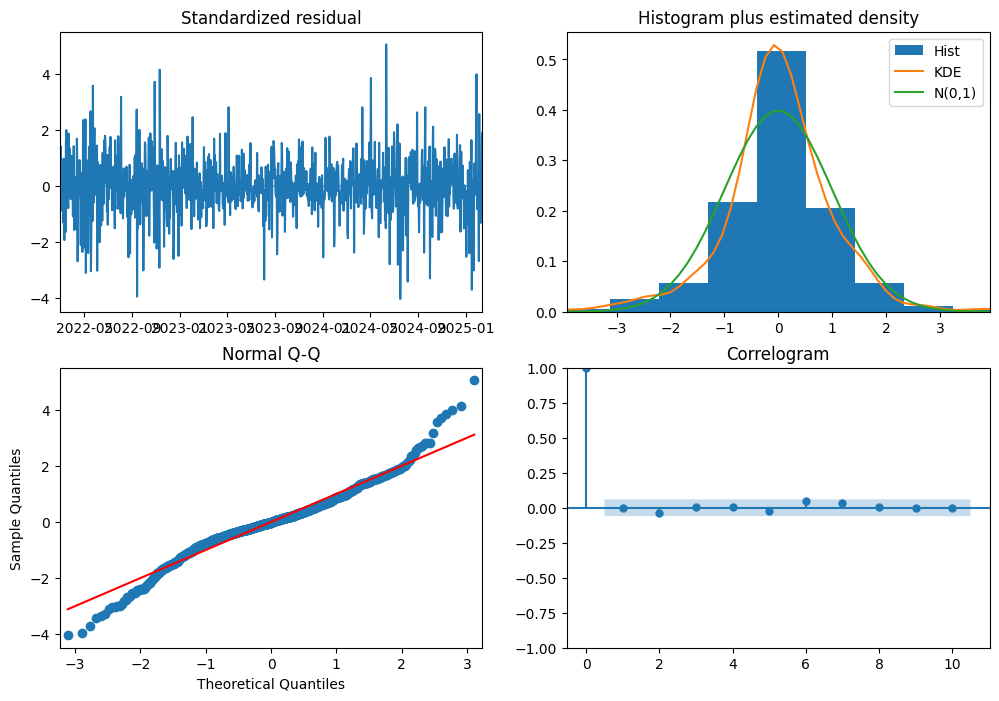

In [55]:
# Plot diagnostics of the fitted SARIMA model to check the residuals
auto_sarima.plot_diagnostics(figsize=(12, 8))
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=5737.352, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=5451.424, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.73 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=5739.165, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[4]             : AIC=5340.529, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[4]             : AIC=5276.656, Time=1.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=3.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=1.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[4]             : AIC=5274.671, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[4]             : AIC=5338.848, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,1)[4]             : AIC=inf, Time=2.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=1.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[4]             : AIC=5276.655, Time=0.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[4]             : AIC=5278.670, Time=0.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[4] intercept   : AIC=5276.661, Time=1.09 sec

Best model:  ARIMA(0,1,0)(3,1,0)[4]          
Total fit time: 14.619 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1095
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 4)   Log Likelihood               -2633.335
Date:                           Thu, 13 Feb 2025   AIC                           5274.671
Time:                                   11:46:11   BIC                           5294.646
Sample:                               02-14-2022   HQIC                          5282.231
                                    - 02-12-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


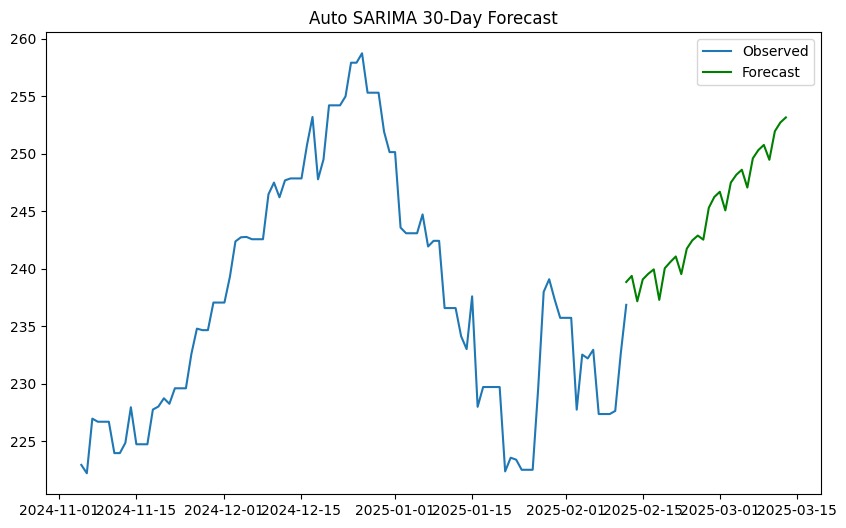

In [56]:
# Fit auto_arima model (with seasonal component)
auto_sarima = pm.auto_arima(aapl_data,
                            seasonal=True,
                            m=4,  # Assuming quaterly seasonality
                            start_p=0, start_q=0,
                            test='adf',
                            max_p=3, max_q=3,
                            start_P=0, start_Q=0,
                            max_P=3, max_Q=3,
                            d=1, D=1,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# Print the summary of the best model
print(auto_sarima.summary())

# Forecast the next 30 periods
forecast_sarima = auto_sarima.predict(n_periods=30)

# Plot the observed and forecast values
plt.figure(figsize=(10, 6))
plt.plot(aapl_data.index[-100:], aapl_data[-100:], label='Observed')
plt.plot(pd.date_range(aapl_data.index[-1], periods=30, freq='D'), forecast_sarima, label='Forecast', color='green')
plt.title('Auto SARIMA 30-Day Forecast')
plt.legend()
plt.show()

**Additive models **

Used when seasonal variations are roughly constant

Useful when the seasonal variation is relatively constant over time

Tends to show a linear trend

**Multiplicative models **

Used when seasonal variations change in proportion to the data

Useful when the seasonal variation increases over time

Tends to show an exponential trend

Good for forecasting sales data for growing businesses

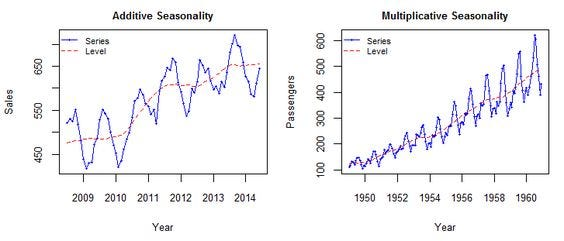

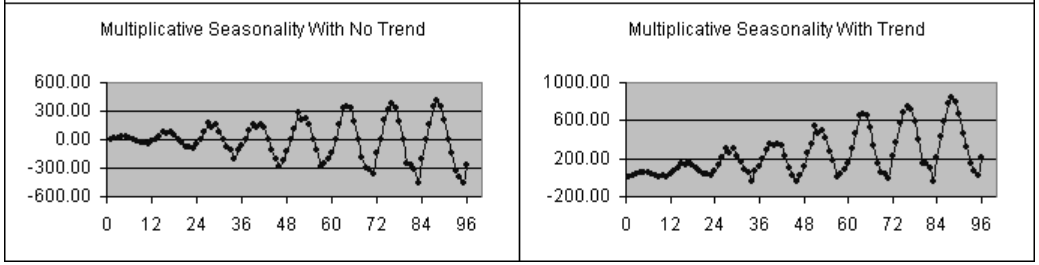

If your data shows a consistent linear trend, and there is no limit on the values that can be reached, go with 'linear'. If your data follows an S-shaped pattern and the values are bounded, choose logistic growth.

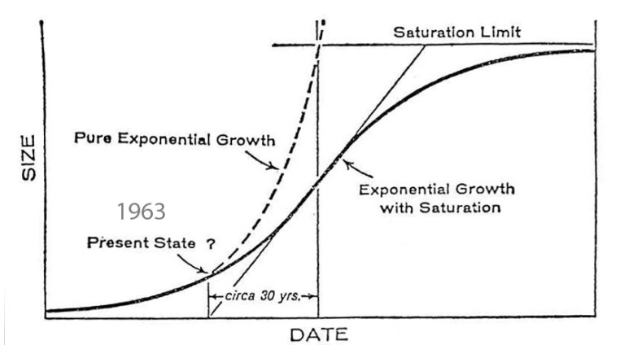

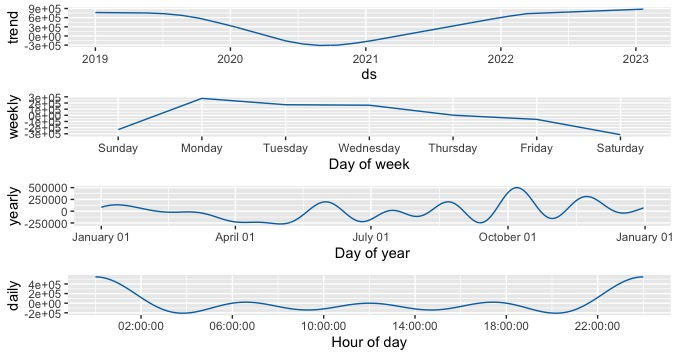

In [57]:
!pip install prophet

In [58]:
aapl_data

,AAPL
Date,
2022-02-14,166.187149
2022-02-15,170.034805
2022-02-16,169.798676
2022-02-17,166.187149
2022-02-18,164.632339
...,...
2025-02-08,227.380005
2025-02-09,227.380005
2025-02-10,227.649994


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpba7grqph/wimvg10h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpba7grqph/h4y1vzc6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29362', 'data', 'file=/tmp/tmpba7grqph/wimvg10h.json', 'init=/tmp/tmpba7grqph/h4y1vzc6.json', 'output', 'file=/tmp/tmpba7grqph/prophet_model6m8to6kn/prophet_model-20250213114617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


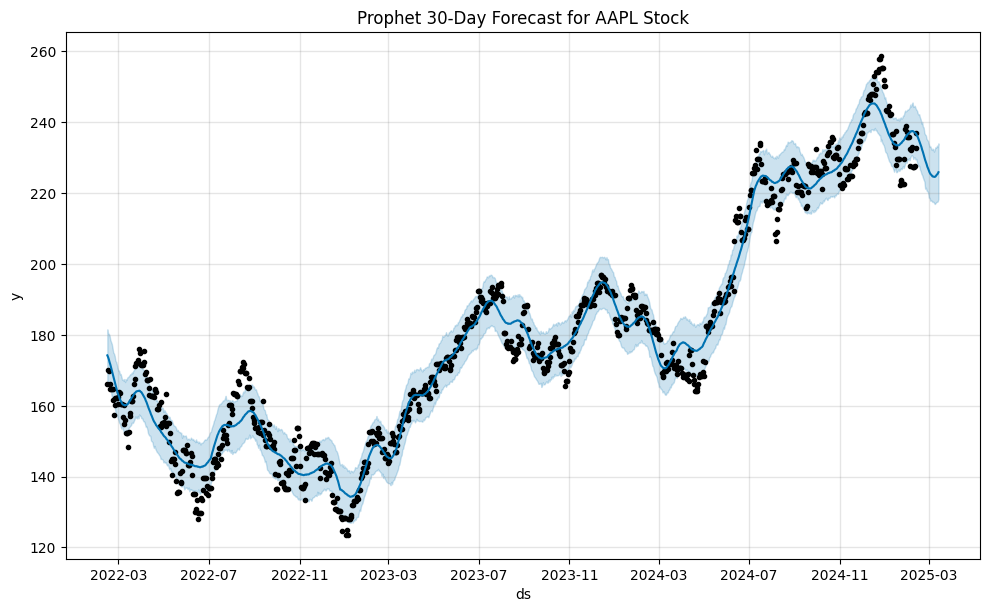

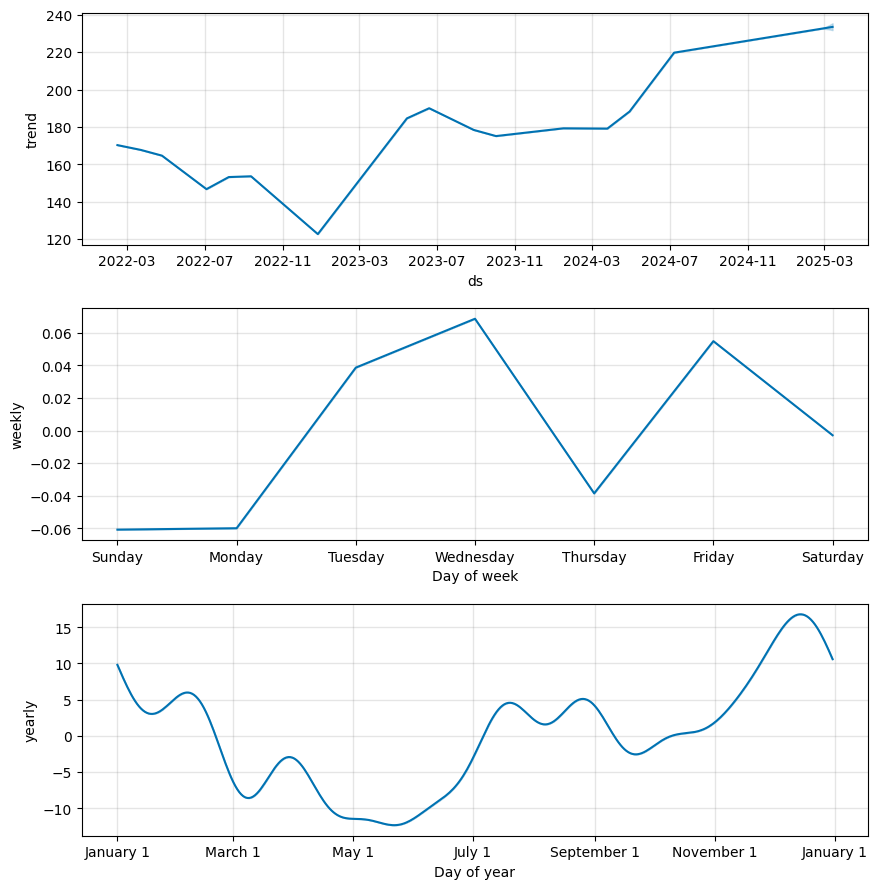

In [59]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data = aapl_data.reset_index()
prophet_data.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values

# Initialize the Prophet model
model = Prophet()

# Fit the model on the historical data
model.fit(prophet_data)

# Forecast for the next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet 30-Day Forecast for AAPL Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpba7grqph/seda0ywm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpba7grqph/ccoq96ed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2630', 'data', 'file=/tmp/tmpba7grqph/seda0ywm.json', 'init=/tmp/tmpba7grqph/ccoq96ed.json', 'output', 'file=/tmp/tmpba7grqph/prophet_model6zd1_pjf/prophet_model-20250213114620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


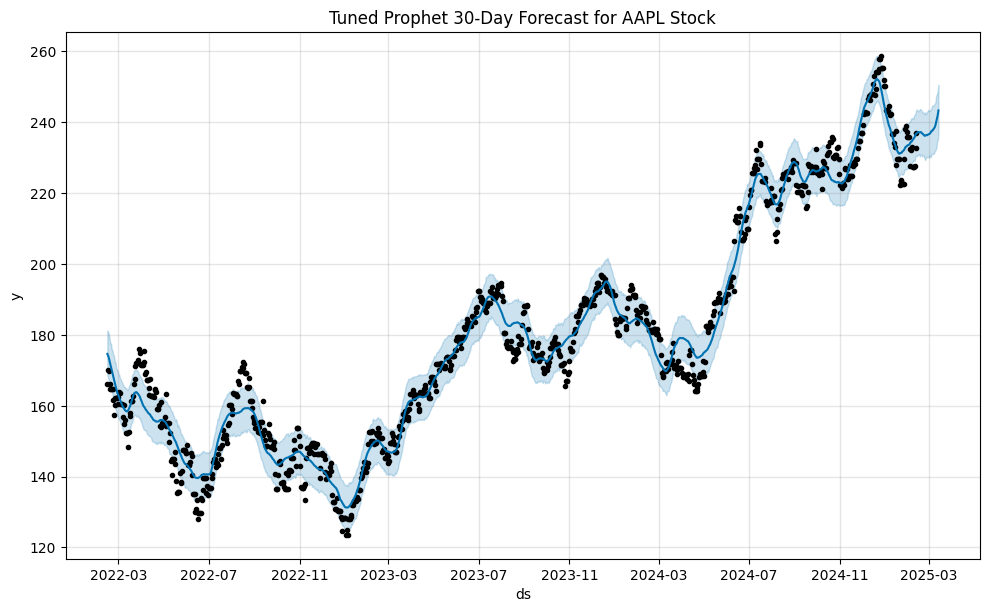

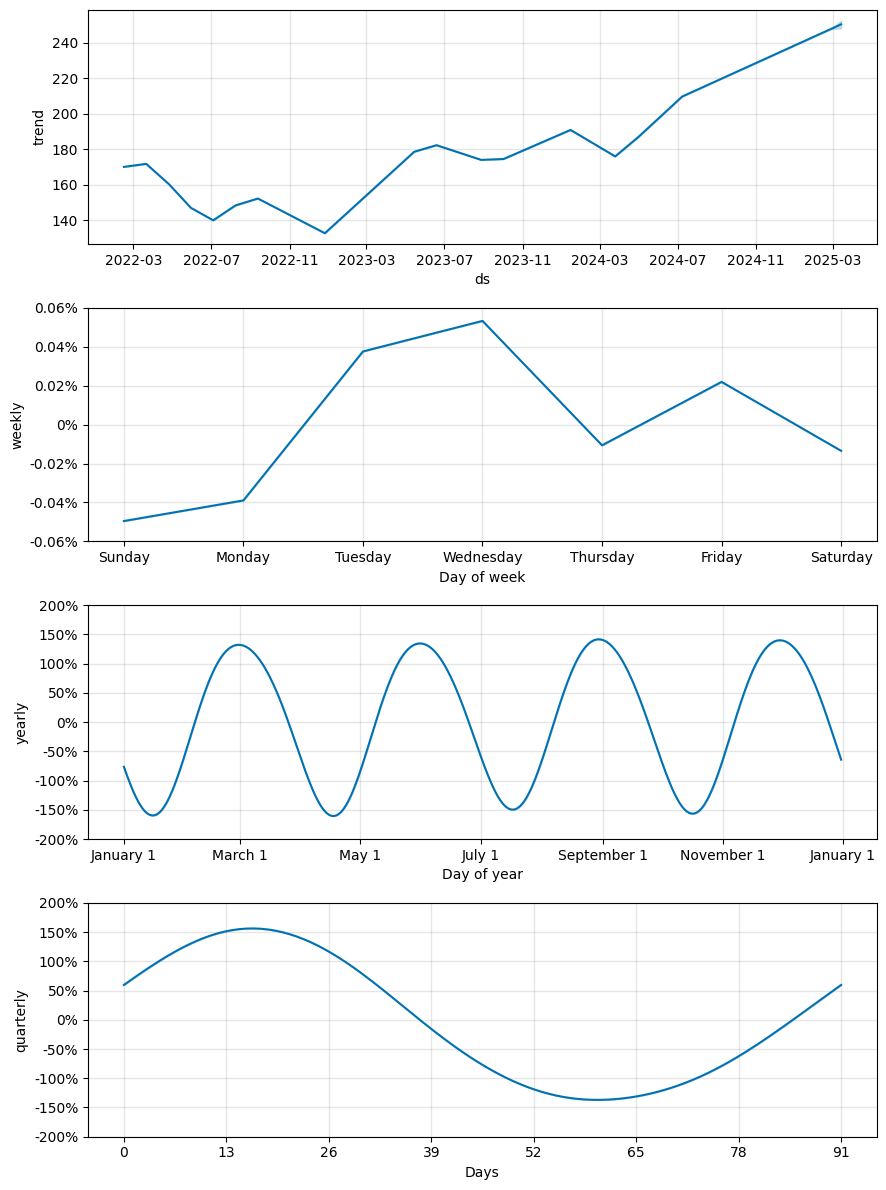

,ds,yhat,yhat_lower,yhat_upper
1095,2025-02-13,236.951608,230.459927,243.542228
1096,2025-02-14,237.224605,230.710360,243.290237
1097,2025-02-15,237.251466,231.043165,243.105988
1098,2025-02-16,237.195094,230.743883,243.360397
1099,2025-02-17,237.177208,230.389484,243.801294
1100,2025-02-18,237.257501,231.029510,243.569240
1101,2025-02-19,237.141853,230.835818,243.452933
1102,2025-02-20,236.805028,230.361588,242.832227
1103,2025-02-21,236.703306,230.577612,242.841734
1104,2025-02-22,236.452902,230.605172,242.665754


In [60]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data = aapl_data.reset_index()
prophet_data.columns = ['ds', 'y']

# Initialize the Prophet model with tuning parameters
model = Prophet(
    growth='linear',              # or 'logistic' for saturation
    changepoint_prior_scale=0.05, # Higher values make the model more flexible in fitting
    seasonality_mode='multiplicative',  # Can be 'additive' or 'multiplicative'
    yearly_seasonality=True,      # Can be set to 'auto' or a specific number
    weekly_seasonality=True       # Weekly seasonality
)

# Add additional seasonality if needed (e.g., quarterly seasonality)
model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

# Fit the model
model.fit(prophet_data)

# Make future dataframe for the next 30 days
future = model.make_future_dataframe(periods=30)

# Forecast
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Tuned Prophet 30-Day Forecast for AAPL Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()

# Evaluate changepoints and seasonality components
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpba7grqph/jhn1j4jn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpba7grqph/gn0eoumi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11863', 'data', 'file=/tmp/tmpba7grqph/jhn1j4jn.json', 'init=/tmp/tmpba7grqph/gn0eoumi.json', 'output', 'file=/tmp/tmpba7grqph/prophet_modeld1ks1jk_/prophet_model-20250213114622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpba

Best Params: Changepoint Prior Scale = 0.1, Seasonality Mode = multiplicative, Growth = linear
Best MAE: 3.438283801646449


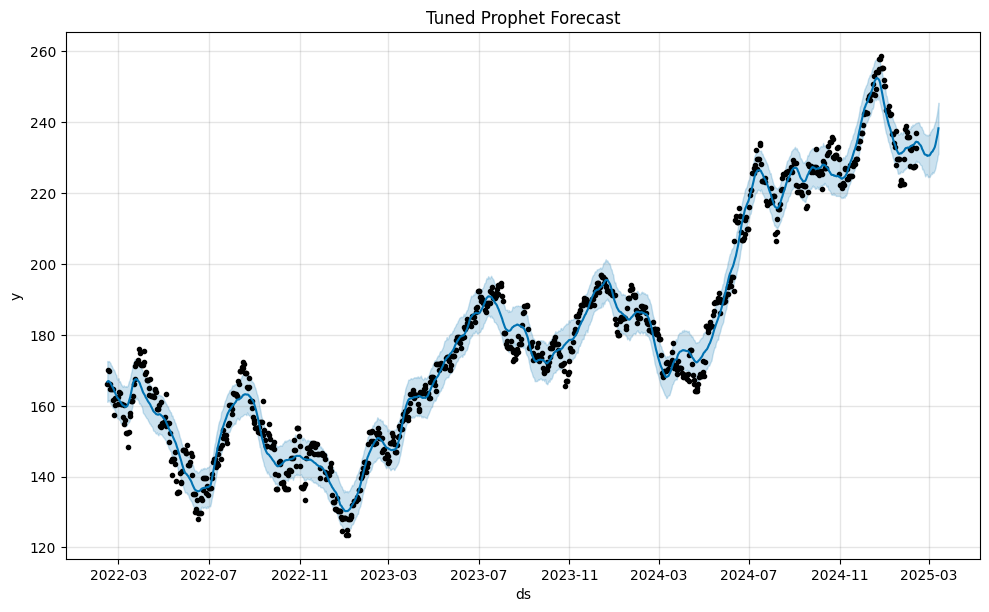

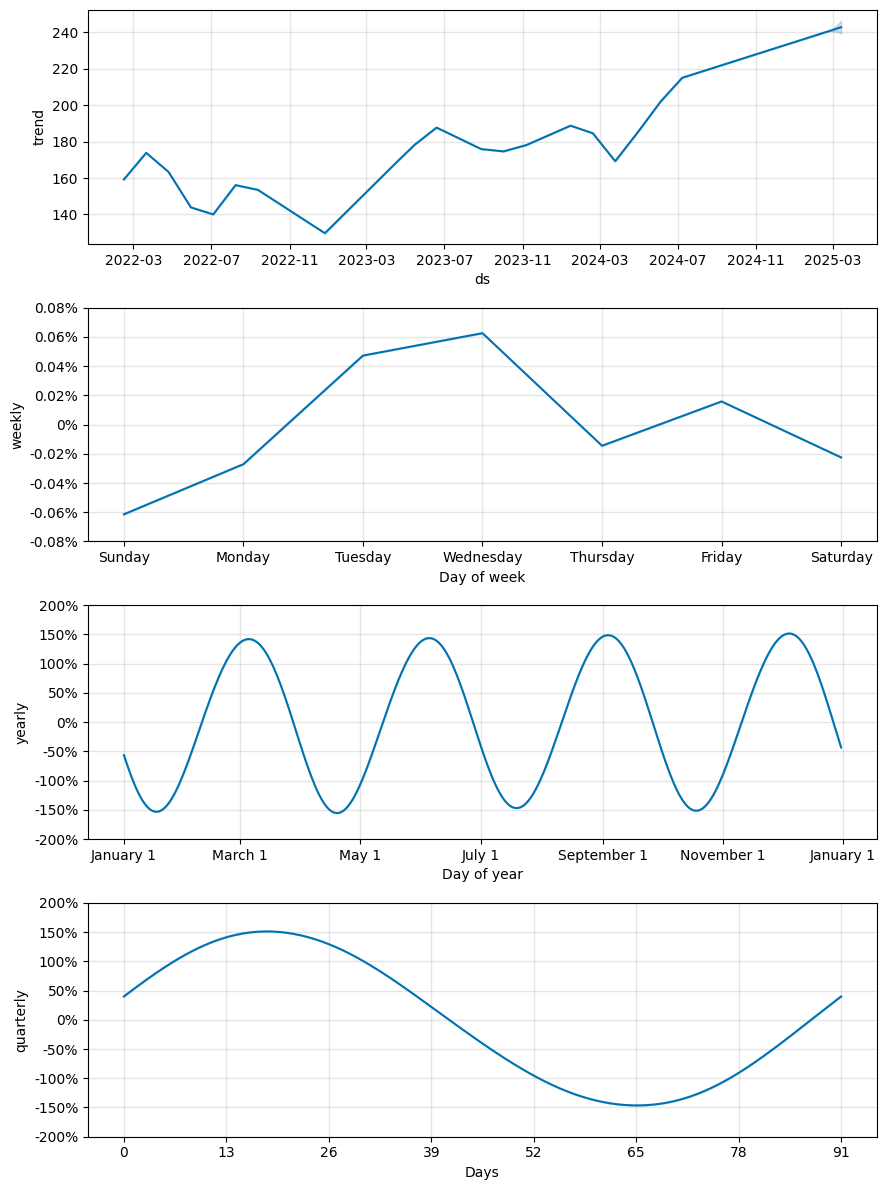

In [61]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd

# Prepare data for Prophet
prophet_data = aapl_data.reset_index()
prophet_data.columns = ['ds', 'y']

# Set a cap (upper limit) for logistic growth, if needed
prophet_data['cap'] = 200

# Define parameter grids for tuning
changepoint_prior_scales = [0.001, 0.01, 0.05, 0.1]
seasonality_modes = ['additive', 'multiplicative']
growth_options = ['linear', 'logistic']

# Initialize variable to store the best model and its corresponding MAE
best_mae = float('inf')
best_params = None
best_model = None

# Loop through different combinations of hyperparameters
for cps in changepoint_prior_scales:
    for sm in seasonality_modes:
        for growth in growth_options:

            # Initialize Prophet model with hyperparameters
            model = Prophet(
                growth=growth,
                changepoint_prior_scale=cps,
                seasonality_mode=sm,
                yearly_seasonality=True,
                weekly_seasonality=True
            )

            # Add additional quarterly seasonality BEFORE fitting the model
            model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

            # Fit the model (with logistic cap if needed)
            if growth == 'logistic':
                model.fit(prophet_data[['ds', 'y', 'cap']])  # Include 'cap' column for logistic growth
            else:
                model.fit(prophet_data[['ds', 'y']])  # No cap for linear growth

            # Make future predictions
            future = model.make_future_dataframe(periods=30)
            if growth == 'logistic':
                future['cap'] = 200  # Ensure future dataframe has 'cap' for logistic growth
            forecast = model.predict(future)

            # Evaluate model performance using MAE
            mae = mean_absolute_error(prophet_data['y'], forecast['yhat'][:len(prophet_data)])

            # Track the best model based on MAE
            if mae < best_mae:
                best_mae = mae
                best_params = (cps, sm, growth)
                best_model = model

# Output the best hyperparameters
print(f"Best Params: Changepoint Prior Scale = {best_params[0]}, Seasonality Mode = {best_params[1]}, Growth = {best_params[2]}")
print(f"Best MAE: {best_mae}")

# Forecast using the best model
future = best_model.make_future_dataframe(periods=30)
if best_params[2] == 'logistic':
    future['cap'] = 200
forecast = best_model.predict(future)

# Plot the forecast
fig = best_model.plot(forecast)
plt.title('Tuned Prophet Forecast')
plt.show()

# Plot components (trend, seasonality, etc.)
fig2 = best_model.plot_components(forecast)
plt.show()
